In [1]:
%load_ext watermark
%watermark

2019-06-28T18:28:39-07:00

CPython 3.7.1
IPython 6.5.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [4]:
# Import libraries
# ----------------

# System
import sys

# Logging
import logging
logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

# Pandas
import pandas as pd

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from titanic import data, models


ModuleNotFoundError: No module named 'titanic'

In [ ]:
raw_data_file = "../data/titanic.csv"
df = pd.read_csv(raw_data_file, usecols=['Name', 'Sex', 'Age', 'Survived'])
print('DataFrame shape: {}'.format(df.shape))
df.head()

In [3]:
# Percentage of missing values in each column
pd.DataFrame(
    df.isnull().sum() / len(df),
    columns=['% Missing Values']
).transpose()

NameError: name 'df' is not defined

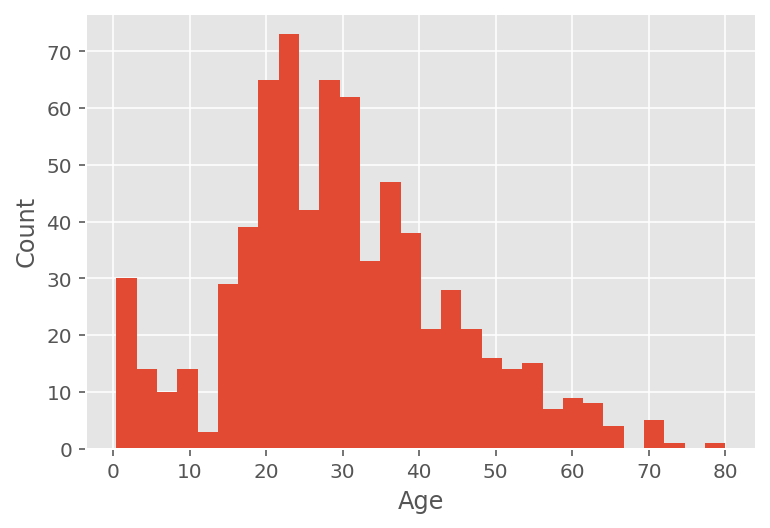

In [6]:
# Age histogram
df.Age.hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [7]:
df = df.fillna({'Age': df.Age.median(), })
df.head()

,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


In [8]:
df = df.astype({
    'Age': 'float64',
    'Name': 'object',
    'Sex': 'category',
    'Survived': 'int64',
})

In [9]:
df = data.extract_title(df)
df.head()

,Survived,Name,Sex,Age,Title
0,0,"Braund, Mr. Owen Harris",male,22.0,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Mrs
2,1,"Heikkinen, Miss. Laina",female,26.0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Mrs
4,0,"Allen, Mr. William Henry",male,35.0,Mr


In [10]:
X_train, X_test, y_train, y_test = models.data_preparation(df, test_size=0.2, random_state=0)

In [11]:
models.run_majority_vote(X_train, X_test, y_train, y_test);

The prediction accuracy with the majority vote classifier is 61.5%


In [13]:
models.run_logistic_regression(X_train, X_test, y_train, y_test);

The prediction accuracy with the ridge logistic regression classifier is 78.2%
